# S204A
## Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
### https://archive.ics.uci.edu/dataset/2/adult


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2023-09-17 16:03:23.279791: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_dict = {}

with open("adult/columns.txt", 'r') as f:
    for line in f:
        key, value = line.rstrip().rstrip(".").split(": ")
        if value == "continuous":
            data_dict[key] = value
        else:
            data_dict[key] = value.split(", ")
    

list(data_dict.keys())

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [3]:
names = ['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country', "income"]

data = pd.read_csv("adult/adult.data", names=names)

In [4]:
data.keys()
cols = list(data.keys())
cols

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [5]:
data.shape

(32561, 15)

In [6]:
data[0:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#test data
merge_test = pd.read_csv("adult/adult.test", names=names)
merge_test[0:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
merge_test.shape

(16281, 15)

In [9]:
#merging test and data together to split my own later

In [10]:
all_data = pd.concat([data, merge_test], axis=0)

In [11]:
all_data.shape

(48842, 15)

In [12]:
all_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
all_data.to_csv('adult/merged.csv')

In [14]:
## find rows or null values.
all_data.isnull()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16277,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16278,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# drop finalweight cols - not an indicator of income
all_data.drop(['fnlwgt'], axis=1, inplace=True)


In [16]:
all_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
## Checking Unique values
print(all_data['age'].nunique())
print(all_data['age'].unique())

74
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


In [18]:
print(all_data['workclass'].nunique())
print(all_data['workclass'].unique())

9
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [19]:
print(all_data['education'].nunique())
print(all_data['education'].unique())

16
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


In [20]:
print(all_data['education-num'].nunique())
print(all_data['education-num'].unique())

16
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


In [21]:
print(all_data['marital-status'].nunique())
print(all_data['marital-status'].unique())

7
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


In [22]:
print(all_data['relationship'].nunique())
print(all_data['relationship'].unique())

6
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


In [23]:
print(all_data['race'].nunique())
print(all_data['race'].unique())

5
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


In [24]:
print(all_data['sex'].nunique())
print(all_data['sex'].unique())

2
[' Male' ' Female']


In [25]:
print(all_data['capital-gain'].nunique())
print(all_data['capital-gain'].unique())

123
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797
  1173  4687  6723  2009  6097  2653  1639 18481  7978  2387  5060  1264
  7262  1731  6612]


In [26]:
print(all_data['capital-loss'].nunique())
print(all_data['capital-loss'].unique())

99
[   0 2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876
 1340 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653
 2392 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547
 2174 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1594 3004
 2231 1844  810 2824 2559 2057 1974  974 2149 1825 1735 1258 2129 2603
 2282  323 4356 2246 1617 1648 2489 3770 1755 3683 2267 2080 2457  155
 3900 2201 1944 2467 2163 2754 2472 1411 1429 3175 1510 1870 1911 2465
 1421]


In [27]:
print(all_data['hours-per-week'].nunique())
print(all_data['hours-per-week'].unique())

96
[40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95 79 69]


In [28]:
print(all_data['native-country'].nunique())
print(all_data['native-country'].unique())

42
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [29]:
print(all_data['income'].nunique())
print(all_data['income'].unique())

4
[' <=50K' ' >50K' ' <=50K.' ' >50K.']


In [30]:
print(all_data['occupation'].nunique())
print(all_data['occupation'].unique())

15
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [31]:
def strip_period(income: str) -> str:
    if income.endswith('.'):
        income = income.rstrip('.')
    return income
        

In [32]:
all_data['income'] = all_data['income'].apply(strip_period)

In [33]:
print(all_data['income'].nunique())
print(all_data['income'].unique())

2
[' <=50K' ' >50K']


In [34]:
## Making income binary
def binary_income(income: str) -> int:
    if income == ' <=50K':
        income = 0
    else:
        income = 1
    return income

In [35]:
all_data['income'] = all_data['income'].apply(binary_income)

In [36]:
# all_data = all_data.drop(all_data[all_data['occupation'] == ' ?'].index)
# print(all_data['occupation'].nunique())
# print(all_data['occupation'].unique())

In [37]:
all_data = all_data.drop(all_data[all_data['native-country'] == ' ?'].index)
print(all_data['native-country'].nunique())
print(all_data['native-country'].unique())

41
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [38]:
all_data = all_data.drop(all_data[all_data['workclass'] == ' ?'].index)
print(all_data['workclass'].nunique())
print(all_data['workclass'].unique())

8
[' State-gov' ' Self-emp-not-inc' ' Private' ' Local-gov' ' Federal-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [39]:
all_data[0:5]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


# Visualisation

In [40]:
import seaborn as sns
from scipy.stats import chi2_contingency

In [41]:
#!pip install pandas seaborn matplotlib

In [42]:
#Education num and education 
edu_contingency = pd.crosstab(all_data['education'], all_data['education-num'])

In [43]:
chi2, p, _, _ = chi2_contingency(edu_contingency)

In [44]:
if p < 0.05: 
    print("There is a significant correlation between the columns.")
else:
    print("There is no significant correlation between the columns.")


There is a significant correlation between the columns.


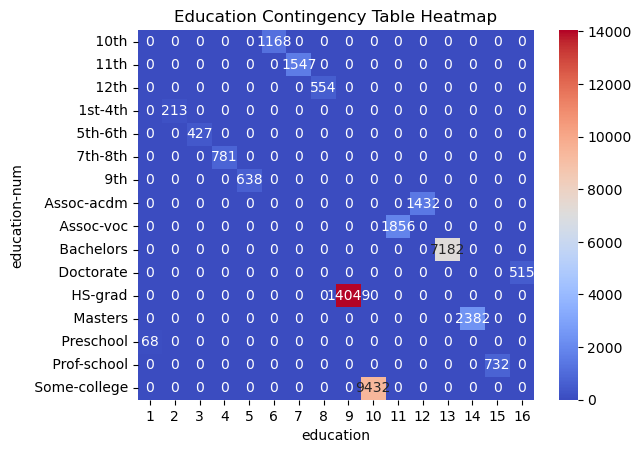

In [45]:
sns.heatmap(edu_contingency, cmap='coolwarm', annot=True, fmt='d')
plt.xlabel('education')
plt.ylabel('education-num')
plt.title('Education Contingency Table Heatmap')
plt.show()


In [46]:
#Education num and education may be Multicollinearity 
marital_contingency = pd.crosstab(all_data['marital-status'], all_data['relationship'])

In [47]:
chi2, p, _, _ = chi2_contingency(marital_contingency)

In [48]:
if p < 0.05: 
    print("There is a significant correlation between the columns.")
else:
    print("There is no significant correlation between the columns.")

There is a significant correlation between the columns.


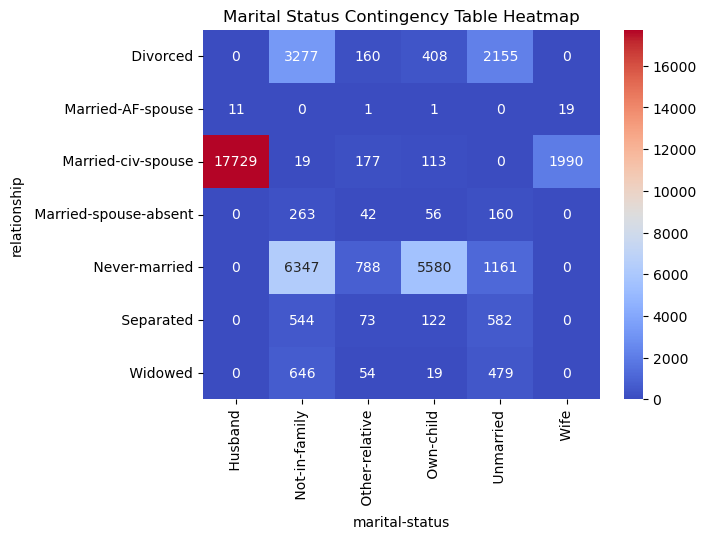

In [49]:
sns.heatmap(marital_contingency, cmap='coolwarm', annot=True, fmt='d')
plt.xlabel('marital-status')
plt.ylabel('relationship')
plt.title('Marital Status Contingency Table Heatmap')
plt.show()

#### Some values are very correlated, others are split (eg. divorced vs widowed) could make a sigifant difference to income. 

In [50]:
## Checking all columns for correlation at once
categorical_cols = ['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income']

In [51]:
correlation_results = pd.DataFrame(columns=['column1', 'column2', 'Chi2 Statistic', 'P-value', 'Correlation'])

/var/folders/53/_d2cntnn2c90pg5yc7ywnsp40000gn/T/ipykernel_31209/565912890.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({
/var/folders/53/_d2cntnn2c90pg5yc7ywnsp40000gn/T/ipykernel_31209/565912890.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({
/var/folders/53/_d2cntnn2c90pg5yc7ywnsp40000gn/T/ipykernel_31209/565912890.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({
/var/folders/53/_d2cntnn2c90pg5yc7ywnsp40000gn/T/ipykernel_31209/565912890.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

/var/folders/53/_d2cntnn2c90pg5yc7ywnsp40000gn/T/ipykernel_31209/565912890.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({
/var/folders/53/_d2cntnn2c90pg5yc7ywnsp40000gn/T/ipykernel_31209/565912890.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({
/var/folders/53/_d2cntnn2c90pg5yc7ywnsp40000gn/T/ipykernel_31209/565912890.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({
/var/folders/53/_d2cntnn2c90pg5yc7ywnsp40000gn/T/ipykernel_31209/565912890.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

/var/folders/53/_d2cntnn2c90pg5yc7ywnsp40000gn/T/ipykernel_31209/565912890.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({
/var/folders/53/_d2cntnn2c90pg5yc7ywnsp40000gn/T/ipykernel_31209/565912890.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({
/var/folders/53/_d2cntnn2c90pg5yc7ywnsp40000gn/T/ipykernel_31209/565912890.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results = correlation_results.append({
/var/folders/53/_d2cntnn2c90pg5yc7ywnsp40000gn/T/ipykernel_31209/565912890.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

   column1 column2  Chi2 Statistic        P-value  Correlation  \
0      NaN     NaN     3342.322209   0.000000e+00  Significant   
1      NaN     NaN    12472.673921   0.000000e+00  Significant   
2      NaN     NaN    12472.673921   0.000000e+00  Significant   
3      NaN     NaN    21302.249295   0.000000e+00  Significant   
4      NaN     NaN     5632.833223   0.000000e+00  Significant   
..     ...     ...             ...            ...          ...   
86     NaN     NaN     6890.092242  1.214596e-182  Significant   
87     NaN     NaN     3299.712969   0.000000e+00  Significant   
88     NaN     NaN     4170.186433   1.866852e-05  Significant   
89     NaN     NaN     3353.919360   0.000000e+00  Significant   
90     NaN     NaN      442.557806   2.554754e-69  Significant   

           Column1         Column2  
0              age       workclass  
1              age       education  
2              age   education-num  
3              age  marital-status  
4              age    

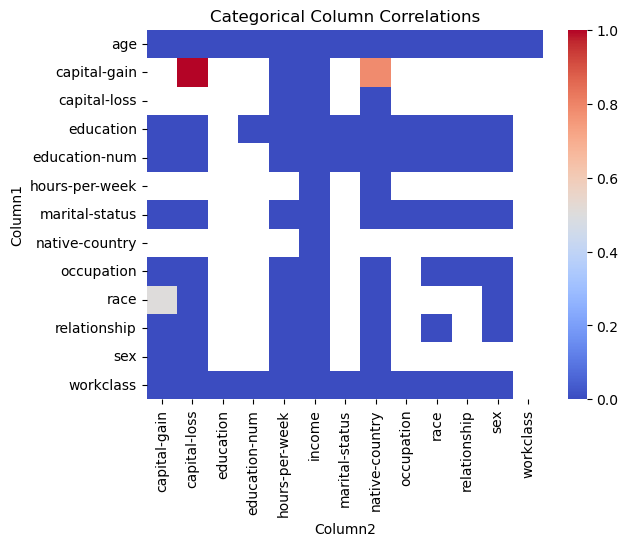

In [52]:
# Iterate through pairs of categorical columns
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        column1 = categorical_cols[i]
        column2 = categorical_cols[j]

        # Create a contingency table for the current column pair
        contingency_table = pd.crosstab(all_data[column1], all_data[column2])

        # Perform the Chi-squared test for independence
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Determine if there is a significant correlation
        if p < 0.05:  # You can adjust the significance level (alpha) as needed
            correlation = "Significant"
        else:
            correlation = "Not Significant"

        # Append the results to the correlation_results DataFrame
        correlation_results = correlation_results.append({
            'Column1': column1,
            'Column2': column2,
            'Chi2 Statistic': chi2,
            'P-value': p,
            'Correlation': correlation
        }, ignore_index=True)

# Print or analyze the correlation results as needed
print(correlation_results)

# Visualize the correlations if desired
# Example heatmap of correlations
correlation_matrix = pd.pivot_table(correlation_results, values='P-value', index='Column1', columns='Column2')
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.10f')
plt.title('Categorical Column Correlations')
plt.show()


In [53]:
# capital gain and loss appear to be correlated. 

In [54]:
#while there is some variation, it is minor. Will drop the 'education'(non numeric) column.
all_data.drop(['education'], axis=1, inplace=True)

### Heat mapping

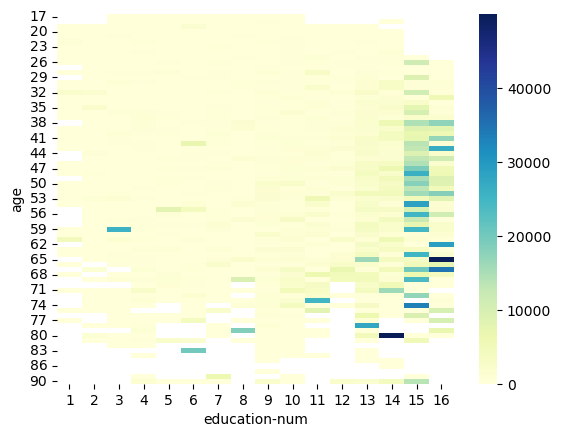

In [55]:
visualise_data = all_data[['age','education-num', 'capital-gain']]
visual_matrix = visualise_data.pivot_table(index="age", columns="education-num", values="capital-gain")
sns.heatmap(visual_matrix, cmap="YlGnBu", annot=False)
plt.show()

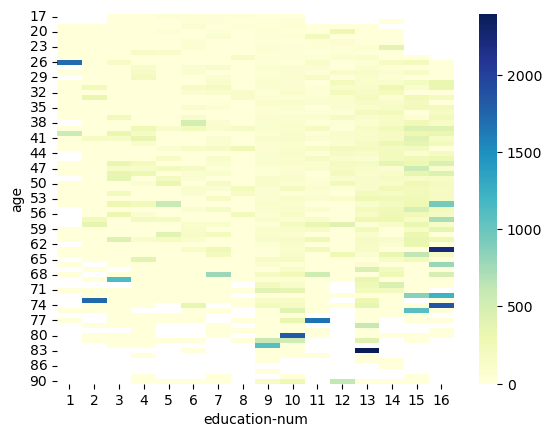

In [56]:
visualise_data_loss = all_data[['age','education-num', 'capital-loss']]
visual_matrix_loss = visualise_data_loss.pivot_table(index="age", columns="education-num", values="capital-loss")
sns.heatmap(visual_matrix_loss, cmap="YlGnBu", annot=False)
plt.show()

# Check Numeric Data

In [57]:
def check_numeric(value: int or str) -> int:
    if isinstance(value, int):
        return value
    else:
        try:
            value = int(''.join(filter(str.isdigit, str(value))))
            return value
        except ValueError:
            # Handle the case where age cannot be converted to an integer
            raise ValueError("Value must be an integer")

In [58]:
all_data['age'] = all_data['age'].apply(check_numeric)
all_data['education-num'] = all_data['education-num'].apply(check_numeric)
all_data['capital-gain'] = all_data['capital-gain'].apply(check_numeric)
all_data['capital-loss'] = all_data['capital-loss'].apply(check_numeric)
all_data['hours-per-week'] = all_data['hours-per-week'].apply(check_numeric)

# Dealing with Categorical Data

In [59]:
data2 = all_data
data2.keys()

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [60]:
from sklearn import preprocessing

In [61]:
le = preprocessing.LabelEncoder()
## Label encode entire dataframe
le_data = data2.apply(le.fit_transform)
le_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,12,4,1,1,4,1,26,0,39,38,0
1,33,5,12,2,4,0,4,1,0,0,12,38,0
2,21,3,8,0,6,1,4,1,0,0,39,38,0
3,36,3,6,2,6,0,2,1,0,0,39,38,0
5,20,3,13,2,4,5,4,0,0,0,39,38,0


In [62]:
## Setting X & Y Values
## Feature Matrix
X = le_data[['age', 'workclass', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country']].values

In [63]:
## Target = 'income'
y = le_data['income']

## Plotting with LE Data

In [64]:
columns_to_plot = ['age', 'education-num', 'sex']

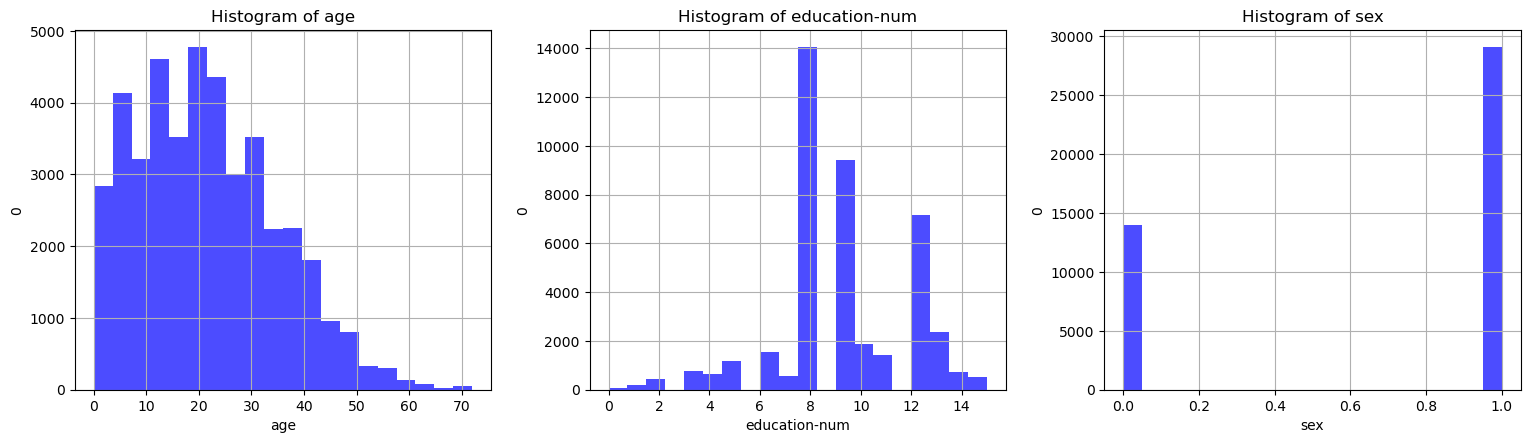

In [65]:

# Set up subplots
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(1, num_plots, figsize=(16, 5))  # Create a 1-row grid of subplots
fig.tight_layout(pad=4.0)  # Adjust the padding as needed

for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Access the subplot directly
    
    # Plot the histogram
    ax.hist(le_data[column], bins=20, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    
    y_label = le_data['income'].iloc[0]
    ax.set_ylabel(y_label)
    
    ax.grid(True)
    
plt.show()


# Setting up Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
## Check dimensions match
print(f'The shape of X_train is: {X_train.shape} and the shape of y_train is {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape} and the shape of y_test is {y_test.shape}')

The shape of X_train is: (30083, 12) and the shape of y_train is (30083,)
The shape of X_test is: (12893, 12) and the shape of y_test is (12893,)


In [69]:
income_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
income_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [70]:
income_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [71]:
#predict
pre_tree = income_tree.predict(X_test)
print(pre_tree[0:5])
print(y_test[0:5])

[0 0 0 0 1]
11954    0
23686    1
6579     0
7700     0
28405    0
Name: income, dtype: int64


In [72]:
#Evaluate
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_accuracy = metrics.accuracy_score(y_test, pre_tree)
print(f"DecisionTrees's Accuracy: {dt_accuracy}")

DecisionTrees's Accuracy: 0.8393702008842008


#### <=50K is 0(False), >50K is 1(True)

<function matplotlib.pyplot.show(close=None, block=None)>

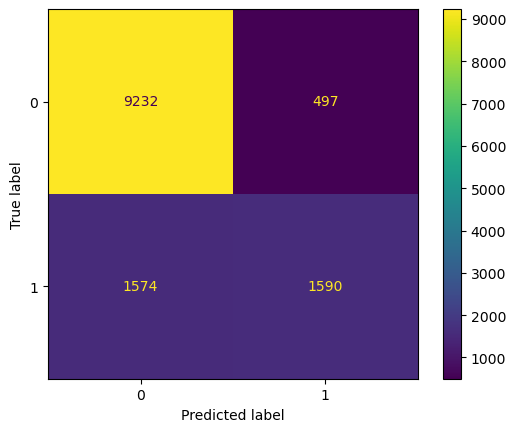

In [73]:
cm = confusion_matrix(y_test, pre_tree, labels=income_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show

# Deep Learning

In [74]:
#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1

In [78]:
#Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      
    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit and sigmoid activation (for binary classification)
])

In [79]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3569 - accuracy: 0.8350 - val_loss: 0.3361 - val_accuracy: 0.8432
Epoch 2/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3326 - accuracy: 0.8432 - val_loss: 0.3342 - val_accuracy: 0.8442
Epoch 3/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3275 - accuracy: 0.8445 - val_loss: 0.3305 - val_accuracy: 0.8455
Epoch 4/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3246 - accuracy: 0.8458 - val_loss: 0.3281 - val_accuracy: 0.8467
Epoch 5/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3222 - accuracy: 0.8482 - val_loss: 0.3252 - val_accuracy: 0.8471
Epoch 6/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3203 - accuracy: 0.8487 - val_loss: 0.3262 - val_accuracy: 0.8452
Epoch 7/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3193 - accuracy: 0.8490 - val_loss: 0.3243 - val_accuracy:

In [82]:
#Eval model on the test data
m1_test_loss, m1_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m1_test_accuracy * 100:.2f}%")

269/269 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8507
Test Accuracy: 85.07%


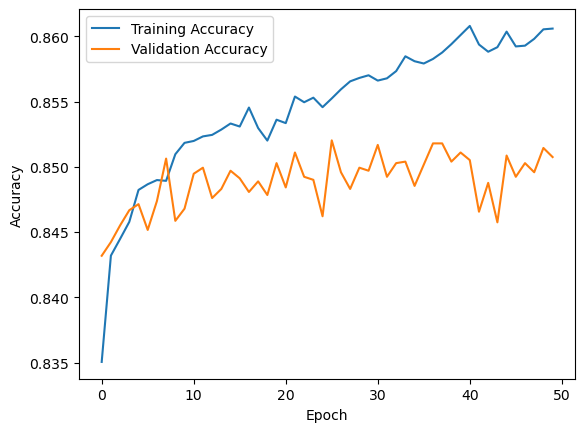

In [83]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 2

In [84]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      # Input layer with 12 features
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit and sigmoid activation (for binary classification)
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3529 - accuracy: 0.8317 - val_loss: 0.3361 - val_accuracy: 0.8420
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3296 - accuracy: 0.8440 - val_loss: 0.3355 - val_accuracy: 0.8425
Epoch 3/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3251 - accuracy: 0.8449 - val_loss: 0.3304 - val_accuracy: 0.8448
Epoch 4/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3222 - accuracy: 0.8462 - val_loss: 0.3276 - val_accuracy: 0.8454
Epoch 5/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3196 - accuracy: 0.8476 - val_loss: 0.3247 - val_accuracy: 0.8447
Epoch 6/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3172 - accuracy: 0.8499 - val_loss: 0.3223 - val_accuracy: 0.8481
Epoch 7/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3150 - accuracy: 0.8508 - val_loss: 0.3236 - val_accuracy:

In [85]:
#Eval model on the test data
m2_test_loss, m2_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m2_test_accuracy * 100:.2f}%")

269/269 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8474
Test Accuracy: 84.74%


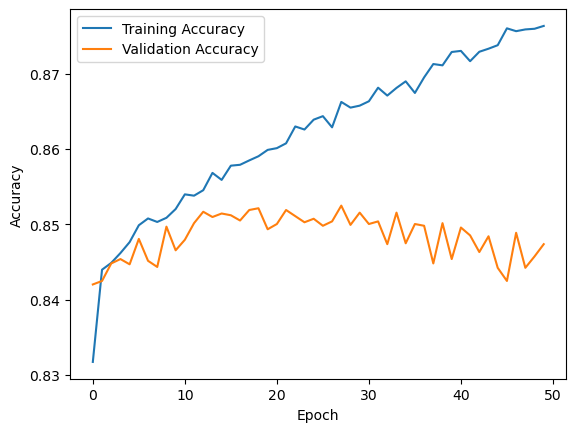

In [86]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 3

In [87]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3490 - accuracy: 0.8366 - val_loss: 0.3317 - val_accuracy: 0.8447
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3309 - accuracy: 0.8444 - val_loss: 0.3310 - val_accuracy: 0.8440
Epoch 3/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3259 - accuracy: 0.8459 - val_loss: 0.3289 - val_accuracy: 0.8445
Epoch 4/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3232 - accuracy: 0.8481 - val_loss: 0.3290 - val_accuracy: 0.8470
Epoch 5/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3204 - accuracy: 0.8485 - val_loss: 0.3240 - val_accuracy: 0.8478
Epoch 6/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3189 - accuracy: 0.8503 - val_loss: 0.3217 - val_accuracy: 0.8484
Epoch 7/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3164 - accuracy: 0.8498 - val_loss: 0.3292 - val_accuracy:

In [88]:
#Eval model on the test data
m3_test_loss, m3_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m3_test_accuracy * 100:.2f}%")

269/269 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.8435
Test Accuracy: 84.35%


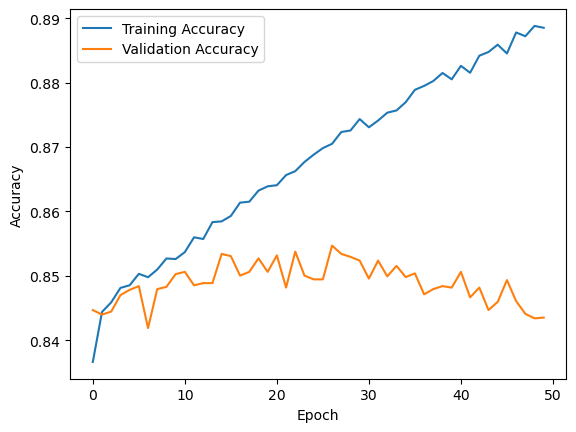

In [89]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Decrease in val accuracy - huge model made it easy to overfit

# Model 4 - (repeat of model 1 for easy comparison)

In [ ]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      # Input layer with 13 features
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(16, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit and sigmoid activation (for binary classification)
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

#Eval model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 5 - Swish

In [90]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      
    keras.layers.Dense(64, activation='swish'),  
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/50
1075/1075 [==============================] - 4s 2ms/step - loss: 0.3683 - accuracy: 0.8271 - val_loss: 0.3380 - val_accuracy: 0.8398
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3366 - accuracy: 0.8412 - val_loss: 0.3339 - val_accuracy: 0.8446
Epoch 3/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3306 - accuracy: 0.8442 - val_loss: 0.3299 - val_accuracy: 0.8452
Epoch 4/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3270 - accuracy: 0.8452 - val_loss: 0.3272 - val_accuracy: 0.8455
Epoch 5/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3244 - accuracy: 0.8462 - val_loss: 0.3239 - val_accuracy: 0.8481
Epoch 6/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3226 - accuracy: 0.8467 - val_loss: 0.3224 - val_accuracy: 0.8482
Epoch 7/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3216 - accuracy: 0.8477 - val_loss: 0.3216 - val_accuracy:

In [93]:
#Eval model on the test data
m5_test_loss, m5_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m5_test_accuracy * 100:.2f}%")

269/269 [==============================] - 1s 2ms/step - loss: 0.3227 - accuracy: 0.8505
Test Accuracy: 85.05%


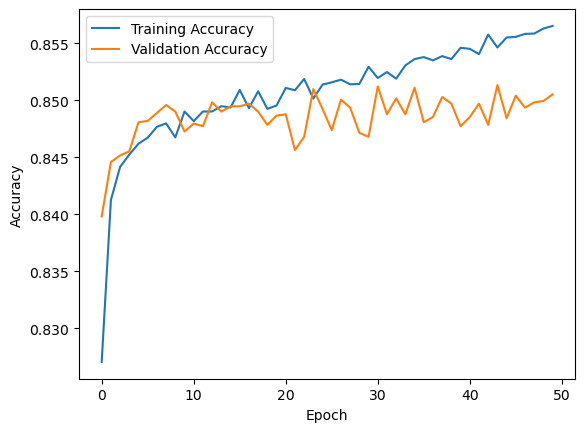

In [94]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 6 - Swish + 0.1 Dropout

In [95]:
# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      # Input layer with 12 features
    keras.layers.Dense(64, activation='swish'),  
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit and sigmoid activation (for binary classification)
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3730 - accuracy: 0.8254 - val_loss: 0.3416 - val_accuracy: 0.8421
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3388 - accuracy: 0.8404 - val_loss: 0.3325 - val_accuracy: 0.8457
Epoch 3/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3337 - accuracy: 0.8420 - val_loss: 0.3298 - val_accuracy: 0.8464
Epoch 4/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3288 - accuracy: 0.8434 - val_loss: 0.3254 - val_accuracy: 0.8457
Epoch 5/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3273 - accuracy: 0.8449 - val_loss: 0.3257 - val_accuracy: 0.8477
Epoch 6/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3252 - accuracy: 0.8456 - val_loss: 0.3222 - val_accuracy: 0.8475
Epoch 7/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3238 - accuracy: 0.8459 - val_loss: 0.3227 - val_accuracy:

In [96]:
#Eval model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

269/269 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8495
Test Accuracy: 84.95%


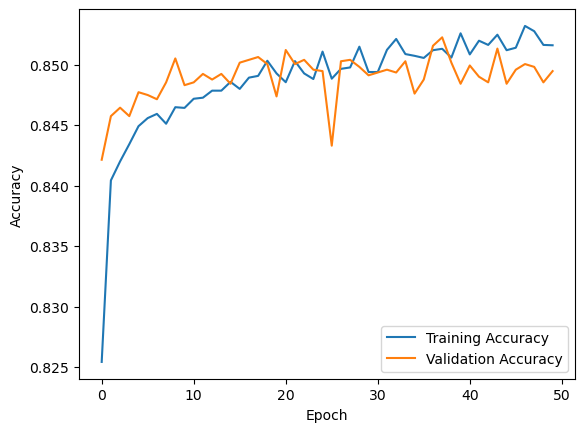

In [97]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 7 - Swish + 0.5 Dropout


In [103]:
# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),     
    keras.layers.Dense(64, activation='swish'),  
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3936 - accuracy: 0.8198 - val_loss: 0.3444 - val_accuracy: 0.8386
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3561 - accuracy: 0.8361 - val_loss: 0.3368 - val_accuracy: 0.8419
Epoch 3/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3471 - accuracy: 0.8353 - val_loss: 0.3336 - val_accuracy: 0.8431
Epoch 4/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3433 - accuracy: 0.8374 - val_loss: 0.3323 - val_accuracy: 0.8438
Epoch 5/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3403 - accuracy: 0.8398 - val_loss: 0.3319 - val_accuracy: 0.8445
Epoch 6/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3385 - accuracy: 0.8396 - val_loss: 0.3307 - val_accuracy: 0.8435
Epoch 7/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3376 - accuracy: 0.8406 - val_loss: 0.3279 - val_accuracy:

In [104]:
#Eval model on the test data
m7_test_loss, m7_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m7_test_accuracy * 100:.2f}%")


269/269 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8512
Test Accuracy: 85.12%


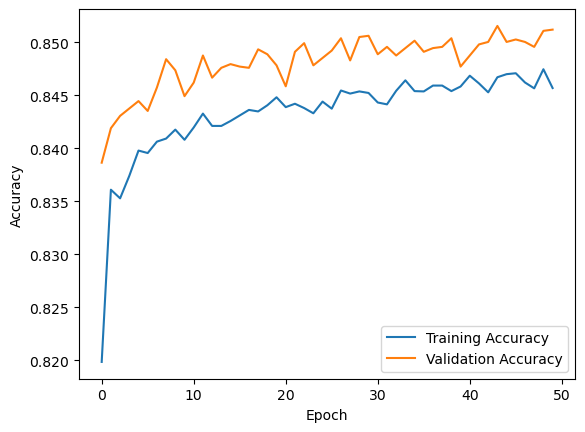

In [105]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 7 - Swish + 0.9 Dropout

Epoch 1/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.4759 - accuracy: 0.7747 - val_loss: 0.3796 - val_accuracy: 0.8252
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.4183 - accuracy: 0.8040 - val_loss: 0.3728 - val_accuracy: 0.8282
Epoch 3/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.4018 - accuracy: 0.8095 - val_loss: 0.3672 - val_accuracy: 0.8335
Epoch 4/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3936 - accuracy: 0.8133 - val_loss: 0.3641 - val_accuracy: 0.8328
Epoch 5/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3863 - accuracy: 0.8179 - val_loss: 0.3665 - val_accuracy: 0.8336
Epoch 6/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3839 - accuracy: 0.8165 - val_loss: 0.3667 - val_accuracy: 0.8368
Epoch 7/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3837 - accuracy: 0.8182 - val_loss: 0.3640 - val_accuracy:

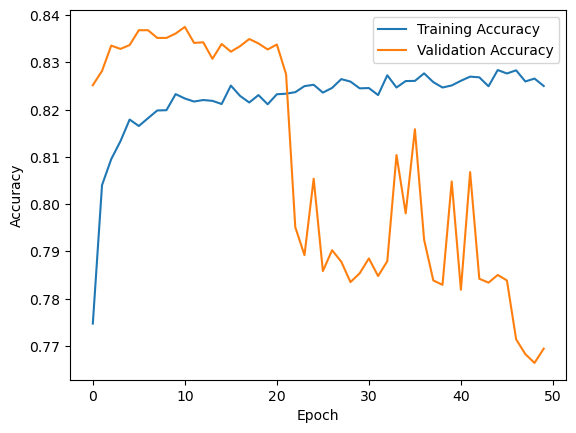

In [375]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(12,)),      # Input layer with 13 features
    keras.layers.Dense(64, activation='swish'),  
    keras.layers.Dropout(0.9),
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit and sigmoid activation (for binary classification)
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

#Eval model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Changing data to OneHot Encoder

In [76]:
data2.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [77]:
data2.keys()

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [78]:
hot = preprocessing.OneHotEncoder()
## OH encode selected cols 
cols_to_oh = ['workclass', 'marital-status',
              'occupation', 'relationship', 'race', 'sex', 'native-country']

uncoded_cols = ['age','education-num', 'capital-gain',
       'capital-loss', 'hours-per-week','income']

# OH Encode the selected columns
oh_data = hot.fit_transform(data2[cols_to_oh])

# Convert the result 
oh_df = pd.DataFrame(oh_data.toarray(), columns=hot.get_feature_names_out(cols_to_oh))

# Reset the index of both DataFrames
oh_df.reset_index(drop=True, inplace=True)
data2.reset_index(drop=True, inplace=True)

# Concate OH encoded columns with the uncoded cols
hot_df = pd.concat([oh_df, data2[uncoded_cols]], axis=1)

hot_df.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,39,13,2174,0,40,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,50,13,0,0,13,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,38,9,0,0,40,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,53,7,0,0,40,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,37,14,0,0,40,0


In [79]:
x_cols = list(hot_df.keys())
x_cols.remove('income')
x_cols


['workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'relationship_ Husband',
 'relationship_ Not-in-family',
 'relationship_ Other-relative',
 'relati

In [80]:
## Setting X & Y Values
## Feature Matrix
hX = hot_df[x_cols].values
## Target = 'income'
hy = hot_df['income']

In [81]:
len(x_cols)

89

# Model 8 - OH Data

In [124]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(hX, hy, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(89,)),      
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(16, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 unit and sigmoid activation (for binary classification)
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3591 - accuracy: 0.8304 - val_loss: 0.3335 - val_accuracy: 0.8443
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3251 - accuracy: 0.8467 - val_loss: 0.3280 - val_accuracy: 0.8469
Epoch 3/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3188 - accuracy: 0.8501 - val_loss: 0.3245 - val_accuracy: 0.8492
Epoch 4/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3141 - accuracy: 0.8530 - val_loss: 0.3293 - val_accuracy: 0.8491
Epoch 5/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3125 - accuracy: 0.8536 - val_loss: 0.3237 - val_accuracy: 0.8503
Epoch 6/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3104 - accuracy: 0.8548 - val_loss: 0.3236 - val_accuracy: 0.8509
Epoch 7/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3093 - accuracy: 0.8547 - val_loss: 0.3240 - val_accuracy:

In [125]:
#Eval model on the test data
m8_test_loss, m8_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m8_test_accuracy * 100:.2f}%")

269/269 [==============================] - 1s 2ms/step - loss: 0.3392 - accuracy: 0.8502
Test Accuracy: 85.02%


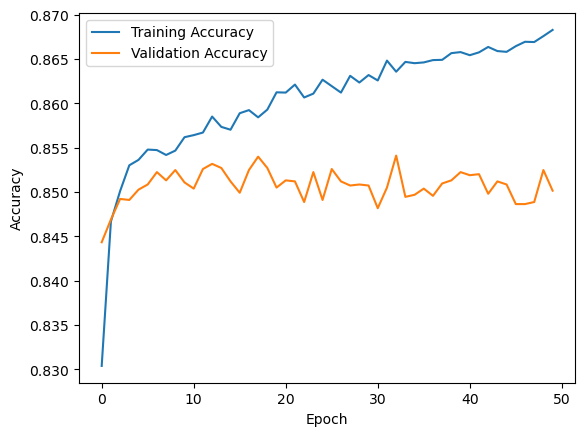

In [126]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 9 - Swish

In [130]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(hX, hy, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(89,)),      
    keras.layers.Dense(64, activation='swish'),  
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3541 - accuracy: 0.8334 - val_loss: 0.3338 - val_accuracy: 0.8452
Epoch 2/50
1075/1075 [==============================] - 2s 2ms/step - loss: 0.3225 - accuracy: 0.8479 - val_loss: 0.3258 - val_accuracy: 0.8477
Epoch 3/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3159 - accuracy: 0.8500 - val_loss: 0.3224 - val_accuracy: 0.8485
Epoch 4/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3124 - accuracy: 0.8532 - val_loss: 0.3243 - val_accuracy: 0.8505
Epoch 5/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3098 - accuracy: 0.8541 - val_loss: 0.3251 - val_accuracy: 0.8505
Epoch 6/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3081 - accuracy: 0.8553 - val_loss: 0.3219 - val_accuracy: 0.8507
Epoch 7/50
1075/1075 [==============================] - 3s 2ms/step - loss: 0.3067 - accuracy: 0.8551 - val_loss: 0.3247 - val_accuracy:

In [131]:
#Eval model on the test data
m9_test_loss, m9_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m9_test_accuracy * 100:.2f}%")

269/269 [==============================] - 1s 2ms/step - loss: 0.4046 - accuracy: 0.8456
Test Accuracy: 84.56%


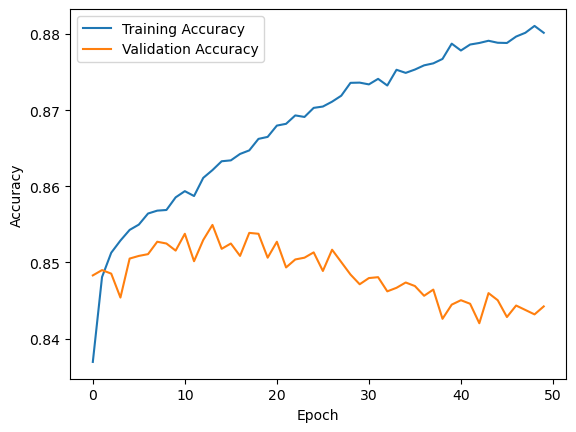

In [129]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 10 - Large model using Swish

In [132]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(hX, hy, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(89,)),      
    keras.layers.Dense(256, activation='swish'),  
    keras.layers.Dense(128, activation='swish'), 
    keras.layers.Dense(64, activation='swish'), 
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1075/1075 [==============================] - 5s 3ms/step - loss: 0.3425 - accuracy: 0.8398 - val_loss: 0.3267 - val_accuracy: 0.8466
Epoch 2/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3231 - accuracy: 0.8486 - val_loss: 0.3293 - val_accuracy: 0.8498
Epoch 3/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3171 - accuracy: 0.8504 - val_loss: 0.3231 - val_accuracy: 0.8520
Epoch 4/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3132 - accuracy: 0.8533 - val_loss: 0.3232 - val_accuracy: 0.8507
Epoch 5/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3096 - accuracy: 0.8548 - val_loss: 0.3225 - val_accuracy: 0.8540
Epoch 6/50
1075/1075 [==============================] - 5s 4ms/step - loss: 0.3046 - accuracy: 0.8562 - val_loss: 0.3189 - val_accuracy: 0.8533
Epoch 7/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.3027 - accuracy: 0.8578 - val_loss: 0.3199 - val_accuracy:

In [135]:
#Eval model on the test data
m10_test_loss, m10_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m10_test_accuracy * 100:.2f}%")

269/269 [==============================] - 1s 3ms/step - loss: 0.5500 - accuracy: 0.8395
Test Accuracy: 83.95%


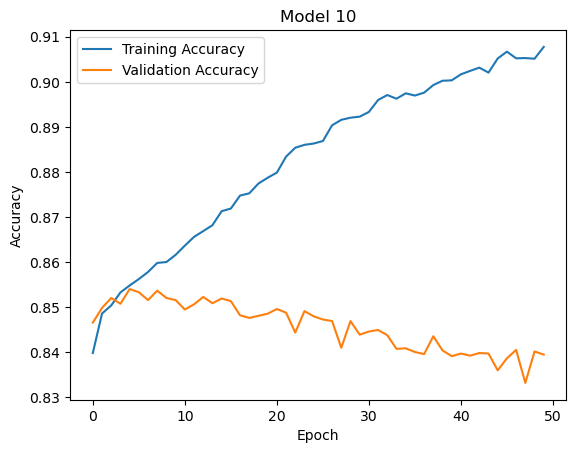

In [136]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 11 - Using Swish and Drop out

In [120]:

# preprocess 
X_train, X_test, y_train, y_test = train_test_split(hX, hy, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(89,)),      
    keras.layers.Dense(256, activation='swish'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='swish'), 
    keras.layers.Dense(64, activation='swish'), 
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1075/1075 [==============================] - 5s 4ms/step - loss: 0.3515 - accuracy: 0.8354 - val_loss: 0.3284 - val_accuracy: 0.8428
Epoch 2/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3309 - accuracy: 0.8436 - val_loss: 0.3308 - val_accuracy: 0.8456
Epoch 3/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3240 - accuracy: 0.8485 - val_loss: 0.3233 - val_accuracy: 0.8503
Epoch 4/50
1075/1075 [==============================] - 4s 3ms/step - loss: 0.3217 - accuracy: 0.8490 - val_loss: 0.3190 - val_accuracy: 0.8526
Epoch 5/50
1075/1075 [==============================] - 5s 4ms/step - loss: 0.3204 - accuracy: 0.8501 - val_loss: 0.3180 - val_accuracy: 0.8537
Epoch 6/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.3164 - accuracy: 0.8530 - val_loss: 0.3186 - val_accuracy: 0.8524
Epoch 7/50
1075/1075 [==============================] - 5s 4ms/step - loss: 0.3149 - accuracy: 0.8524 - val_loss: 0.3195 - val_accuracy:

In [121]:
#Eval model on the test data
m11_test_loss, m11_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m11_test_accuracy * 100:.2f}%")

269/269 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.8542
Test Accuracy: 85.42%


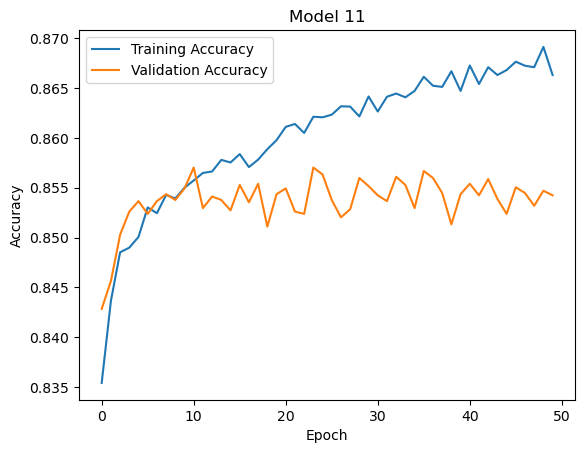

In [122]:
# plot training history to visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 11')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [123]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test, y_pred_binary)

269/269 [==============================] - 1s 2ms/step


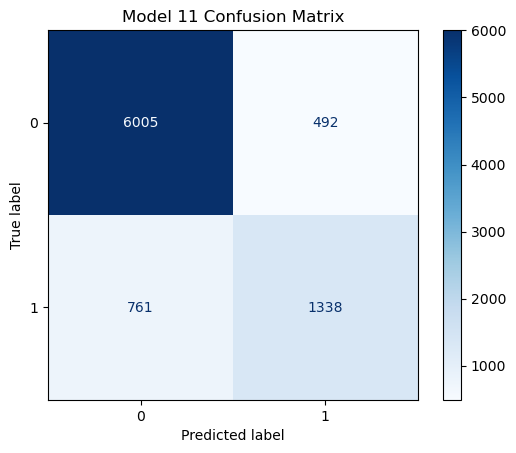

In [124]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Model 11 Confusion Matrix')
plt.show()


## Checking for imbalanced data in my dataset

In [82]:
income_distribution = hot_df['income'].value_counts()

print("Income Distribution:")
print(income_distribution)

Income Distribution:
0    32313
1    10663
Name: income, dtype: int64


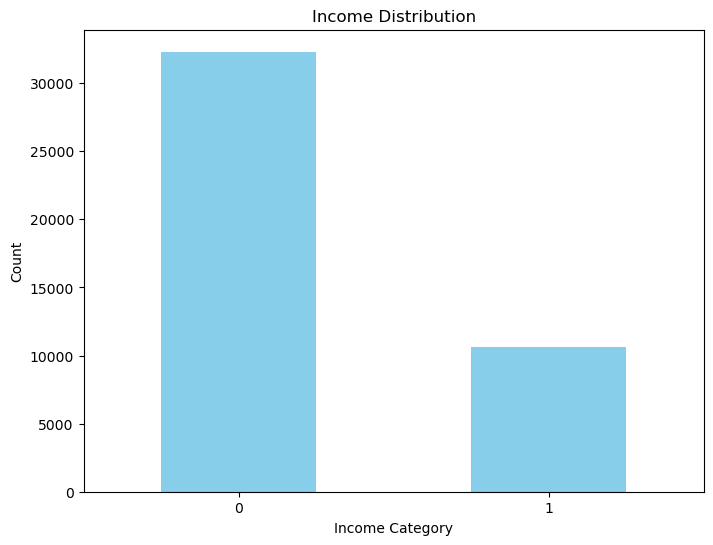

In [83]:
plt.figure(figsize=(8, 6))
income_distribution.plot(kind='bar', color='skyblue')
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [84]:
#!pip install -U imbalanced-learn

In [85]:
from imblearn.combine import SMOTEENN

In [86]:
X = hot_df.drop(columns=['income'])  
y = hot_df['income']  

1    26169
0    22506
Name: income, dtype: int64


In [88]:
#  SMOTEENN 
smote_enn = SMOTEENN(random_state=42)

In [89]:
# Resample 
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [91]:
# Check new class distribution
print(pd.Series(y_resampled).value_counts())

1    26169
0    22506
Name: income, dtype: int64


# Model 12 - Using resampled data

In [92]:
# preprocess 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Input(shape=(89,)),     
    keras.layers.Dense(64, activation='swish'),  
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='swish'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1217/1217 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.8845 - val_loss: 0.2245 - val_accuracy: 0.9128
Epoch 2/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.2244 - accuracy: 0.9109 - val_loss: 0.2142 - val_accuracy: 0.9172
Epoch 3/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.2143 - accuracy: 0.9151 - val_loss: 0.2065 - val_accuracy: 0.9192
Epoch 4/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.2058 - accuracy: 0.9177 - val_loss: 0.2037 - val_accuracy: 0.9224
Epoch 5/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.2005 - accuracy: 0.9211 - val_loss: 0.1984 - val_accuracy: 0.9222
Epoch 6/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.1967 - accuracy: 0.9230 - val_loss: 0.1987 - val_accuracy: 0.9245
Epoch 7/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.1952 - accuracy: 0.9231 - val_loss: 0.1957 - val_accuracy:

In [94]:
m12_test_loss, m12_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m12_test_accuracy * 100:.2f}%")

305/305 [==============================] - 1s 2ms/step - loss: 0.1590 - accuracy: 0.9368
Test Accuracy: 93.68%


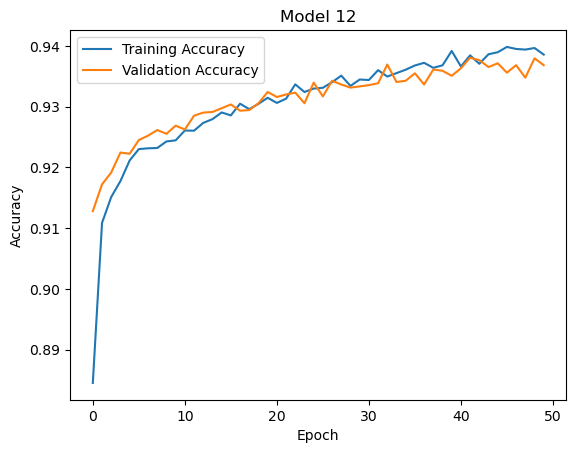

In [96]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 12')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 13 (Model 1 with OH Resampled Data)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(89,)),      
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid') 
])

# Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.2424 - accuracy: 0.9010 - val_loss: 0.2127 - val_accuracy: 0.9186
Epoch 2/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.1958 - accuracy: 0.9225 - val_loss: 0.2002 - val_accuracy: 0.9272
Epoch 3/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.1823 - accuracy: 0.9291 - val_loss: 0.1952 - val_accuracy: 0.9258
Epoch 4/50
1217/1217 [==============================] - 4s 3ms/step - loss: 0.1723 - accuracy: 0.9332 - val_loss: 0.1912 - val_accuracy: 0.9278
Epoch 5/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.1653 - accuracy: 0.9354 - val_loss: 0.1828 - val_accuracy: 0.9304
Epoch 6/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.1580 - accuracy: 0.9390 - val_loss: 0.1859 - val_accuracy: 0.9289
Epoch 7/50
1217/1217 [==============================] - 3s 3ms/step - loss: 0.1525 - accuracy: 0.9409 - val_loss: 0.1804 - val_accuracy:

In [104]:
m13_test_loss, m13_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {m13_test_accuracy * 100:.2f}%")

305/305 [==============================] - 1s 2ms/step - loss: 0.1868 - accuracy: 0.9442
Test Accuracy: 94.42%


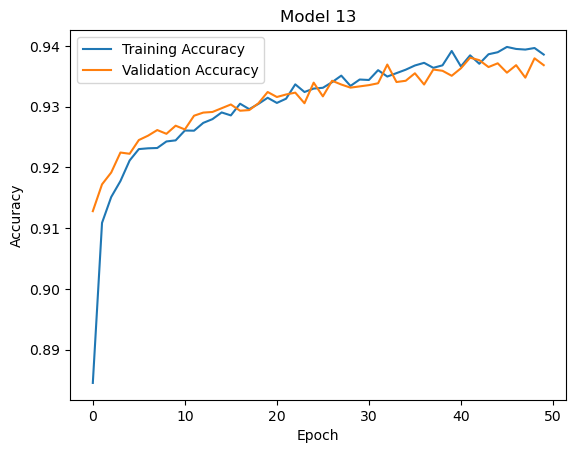

In [102]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 13')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Final Confusion Matrix


In [109]:
y_pred = model.predict(X_test)

305/305 [==============================] - 1s 2ms/step


In [112]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [113]:
confusion = confusion_matrix(y_test, y_pred_binary)

In [114]:
TP = confusion[1, 1]  # True Positives
TN = confusion[0, 0]  # True Negatives
FP = confusion[0, 1]  # False Positives
FN = confusion[1, 0]  # False Negatives

In [115]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.94
Precision: 0.94
Recall: 0.95
F1 Score: 0.95


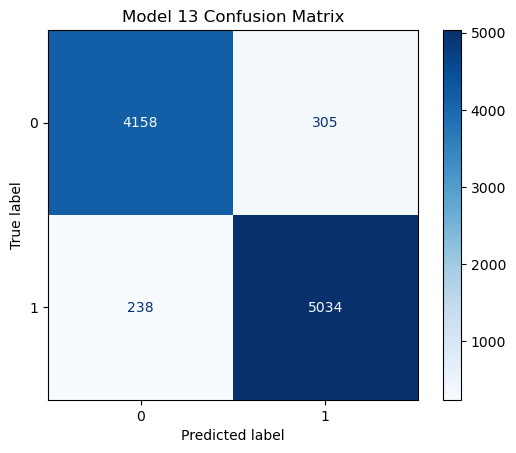

In [117]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Model 13 Confusion Matrix')
plt.show()
